In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)

##### 1. How likely is it that you roll doubles when rolling two dice?

In [2]:
outcomes = [1,2,3,4,5,6]
sims = 100_000
trials = 2

rolls = pd.DataFrame(np.random.choice(outcomes, (sims, trials)))
rolls.head()

,0,1
0,6,3
1,5,3
2,2,4
3,3,4
4,2,2


In [3]:
doubles = rolls[rolls[0] == rolls[1]]
doubles.head()

,0,1
4,2,2
17,5,5
24,3,3
27,4,4
38,2,2


In [4]:
len(doubles)/len(rolls)

0.16497

##### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [5]:
#heads is 1, tails is 0
outcomes = [0, 1]
sims = 100_000
trials = 8

flips = pd.DataFrame(np.random.choice(outcomes, (sims, trials)))
flips.head()

,0,1,2,3,4,5,6,7
0,1,1,1,1,0,1,1,0
1,0,0,0,0,1,0,1,0
2,0,0,1,1,1,1,0,0
3,0,1,1,1,0,1,0,0
4,1,1,0,1,0,0,1,0


In [6]:
heads = flips.sum(axis=1)
heads.head()

0    6
1    2
2    4
3    4
4    4
dtype: int64

In [7]:
# Prob of getting exactly 3 heads
(heads == 3).mean()

0.21941

In [8]:
# Prob of getting more than 3 heads
(heads > 3).mean()

0.63587

##### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [9]:
webd = .75
ds = .25
bbs = 2
sims = 100_000

data = np.random.random((sims, bbs))
data

array([[0.66709312, 0.42710373],
       [0.33057295, 0.67663041],
       [0.95454716, 0.23843883],
       ...,
       [0.98317484, 0.42999776],
       [0.12575455, 0.79328537],
       [0.17391215, 0.73017972]])

In [10]:
ds_bbs = (data < ds).sum(axis=1)
ds_bbs

array([0, 0, 1, ..., 0, 1, 1])

In [11]:
# Prob of seeing ds on both bbs
(ds_bbs == 2).mean()

0.0628

##### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [12]:
u = 3
sd = 1.5
stock = 17
days = 5
sims = 100_000

consumed = np.random.normal(3, 1.5, (sims, days))
consumed

array([[2.96117887, 3.45139455, 2.6007879 , 5.9429666 , 2.20910624],
       [4.25520356, 2.01038827, 4.36264899, 2.43993081, 0.6717857 ],
       [1.15751801, 5.73443845, 1.1101382 , 3.74108509, 3.68014603],
       ...,
       [3.50405041, 2.2593171 , 0.57255717, 0.78678162, 3.05013477],
       [0.34122777, 1.86955328, 1.6996945 , 1.77126512, 4.18491559],
       [2.32429642, 3.4017029 , 3.54669039, 3.00191907, 1.47549027]])

In [13]:
week_consumed = (consumed.sum(axis=1))
week_consumed

array([17.16543416, 13.73995733, 15.42332579, ..., 10.17284107,
        9.86665627, 13.75009904])

In [14]:
# Prob of less than 17 packages bought any given week
(week_consumed < 17).mean()

0.72526

##### 5. Compare Heights
##### 5.a Men have an average height of 178 cm and standard deviation of 8cm.

In [15]:
u_men = 178
sd_men = 8

##### 5.b Women have a mean of 170, sd = 6cm.

In [16]:
u_women = 170
sd_women = 6

##### 5.c Since you have means and standard deviations, you can use np.random.normal to generate observations.

In [17]:
sims = 100_000
men_obs = np.random.normal(u_men, sd_men, sims)
women_obs = np.random.normal(u_women, sd_women, sims)

##### 5.d If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [18]:
(men_obs < women_obs).mean()

0.20925

##### 6.a When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 

In [19]:
sims = 100_000
students = 50
corrupted = 1/250

installs = np.random.random((sims, students))
installs

array([[0.67327138, 0.13390658, 0.60859599, ..., 0.66149634, 0.66944186,
        0.96790529],
       [0.25974514, 0.24519503, 0.91133252, ..., 0.4388001 , 0.69169291,
        0.02896595],
       [0.1427483 , 0.48222374, 0.23539917, ..., 0.22080711, 0.12014537,
        0.33200168],
       ...,
       [0.04956946, 0.65911548, 0.2391812 , ..., 0.00965693, 0.29725735,
        0.46174351],
       [0.98940418, 0.14085637, 0.13810032, ..., 0.60721196, 0.2898249 ,
        0.30687426],
       [0.04753578, 0.40098813, 0.00582251, ..., 0.54615585, 0.56283786,
        0.99785016]])

In [20]:
fails = (installs < corrupted).sum(axis=1)
fails

array([0, 1, 1, ..., 0, 0, 0])

In [21]:
# Prob of no download fails:
(fails == 0).mean()

0.81928

##### 6.b 100 students?

In [22]:
sims = 100_000
students = 100
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.66675

##### 6.c What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [23]:
sims = 1
students = 150
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.0

##### 6.d How likely is it that 450 students all download anaconda without an issue?

In [24]:
sims = 100_000
students = 450
corrupted = 1/250

installs = np.random.random((sims, students))
fails = (installs < corrupted).sum(axis=1)
(fails == 0).mean()

0.16421

##### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [25]:
sims = 100_000
truck_show = .7
days = 3

data = np.random.random((sims, days))
truck_no_show = (data > truck_show).sum(axis=1)
(truck_no_show == 3).mean()

0.02733

##### 7.b How likely is it that a food truck will show up sometime this week?

In [26]:
sims = 100_000
truck_show = .7
days = 7

data = np.random.random((sims, days))
truck_no_show = (data > truck_show).sum(axis=1)
(truck_no_show < 7).mean()

0.99978

##### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [27]:
sims = 100_000
days = range(365)
people = 23

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,90,85,289,327,128,236,109,148,232,63,...,281,16,298,127,110,226,42,158,140,116
1,104,110,113,166,1,17,183,240,236,341,...,268,275,124,167,324,232,131,234,24,101
2,318,306,250,219,205,117,192,65,338,259,...,1,69,61,323,330,239,171,229,138,312
3,79,144,249,257,40,185,108,247,289,182,...,93,358,74,23,202,90,62,138,109,194
4,56,328,109,336,196,196,277,358,182,303,...,275,290,329,247,293,211,47,307,297,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,364,275,261,342,294,180,157,174,335,154,...,290,294,50,149,266,162,186,352,190,54
99996,102,189,346,305,185,340,34,115,246,141,...,27,109,320,117,67,50,107,10,36,70
99997,235,297,9,59,120,88,178,302,179,122,...,225,24,352,351,355,149,156,214,247,347
99998,35,108,45,69,285,221,190,60,193,19,...,93,224,349,216,332,64,240,54,233,13


In [28]:
def doubles(b):
    if len(b) > len(b.unique()):
        return True
    return False

In [29]:
doubs = birthdays.apply(doubles, axis=1)

In [30]:
(doubs == True).mean()

0.50546

In [31]:
#20 people
sims = 100_000
days = range(365)
people = 20

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.apply(doubles, axis=1)
(doubs == True).mean()

0.40965

In [32]:
#40 people
sims = 100_000
days = range(365)
people = 40

birthdays = pd.DataFrame(np.random.choice(days, (sims, people)))
doubs = birthdays.apply(doubles, axis=1)
(doubs == True).mean()

0.89219

#### BONUS: Mage Dual

##### Let's use what we've learned to play a mage duel!
##### Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.
##### Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

#### Exercises
##### Simulate mage duels to answer who is the more powerful mage?
##### Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.

In [33]:
# 6d4

##### Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?

In [34]:
duals = 10
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.6

##### Do the results change much at 100 duels?

In [35]:
duals = 100
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.59

##### Now, simulate 10,000 mage duels. Is there a clear winner?

In [36]:
duals = 10_000
d4_outcomes = [1,2,3,4]
d4_throw = 6

d6_outcomes = [1,2,3,4,5,6]
d6_throw = 4

d4_damage = np.random.choice(d4_outcomes, (duals, d4_throw))
d6_damage = np.random.choice(d6_outcomes, (duals, d6_throw))

d4_wins = d4_damage.sum(axis=1) > d6_damage.sum(axis=1)
(d4_wins).mean()

0.5448

In [37]:
#6d4 is the clear winner, winning 55% of duals

### BONUS: Chuck a Luck

#### Rules:

##### The player pays $1 to play and picks a number.

##### The House rolls 3 dice at once.

##### Payouts:

#####  - 3 if all three dice match the chosen number
#####  - 2 if exactly two dice match the chosen number
#####  - 1 is exactly one of the dice matches the chosen number
#####  - If none of the dice match the player's chosen number, then the House keeps the $1.

#### Exercises:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sims = 1_000_000
throws = 3
outcomes = [1,2,3,4,5,6]
num = np.random.choice(outcomes)

trials = np.random.choice(outcomes, (sims, throws))
win = (trials == num).sum(axis=1)
payout = win - 1

##### What are your chances of getting an outcome payout of 2? (where we earned 3 on the $1 ante)

In [40]:
(payout == 2).mean()

0.004626

##### What are your chances of getting an payout of $1?

In [41]:
(payout == 1).mean()

0.069289

##### What are your chances of getting a payout of 0 where you ante 1 and win 1?

In [42]:
(payout == 0).mean()

0.348092

##### What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

In [43]:
(payout == -1).mean()

0.577993

##### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [44]:
payout.mean()

-0.499452

##### Chart out a histogram of all the outcomes of those 1,000,000 games

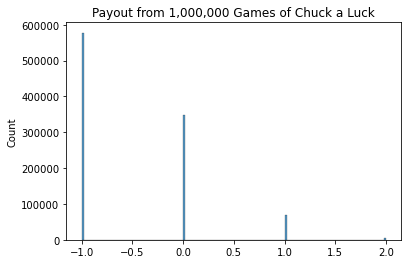

In [45]:
sns.histplot(payout)
plt.title("Payout from 1,000,000 Games of Chuck a Luck")
plt.show()

##### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

In [46]:
# No

##### If you play 1,000,000 games in a row, what are your winnings/losses?

In [47]:
payout.sum()

-499452